<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguage Natural

## Taller #7: Clasificación y Agrupación
`Fecha de entrega: Octubre 24, 2020. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [1]:
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

In [2]:
# Cargar datos
path = 'C:/Python/NLP/nlp_projects/Clase_nueve/reviews_vidjew_es.csv'
data = pd.read_csv(path)
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


# Parte 1: Clasificación

### `[6 pts]` Punto 1: Dividir el conjunto de datos en entrenamiento y prueba

In [3]:
train, test = train_test_split(data, test_size=0.8, random_state=42)

print(f"El cojunto de datos de entrenamiento tiene {train.shape[0]} registros")
print(f"El cojunto de datos de prueba tiene {test.shape[0]} registros")

El cojunto de datos de entrenamiento tiene 200 registros
El cojunto de datos de prueba tiene 800 registros


###  `[6 pts]` Punto 2: Hacer pre-procesamiento del texto

In [17]:
stopwords_sp = stopwords.words('spanish')

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    return texto

tfidf_vect_clasificacion =  TfidfVectorizer(preprocessor=pre_procesado)

In [18]:
X_train = tfidf_vect_clasificacion.fit_transform(train.review_body.values)
y_train = train.product_category.values

X_test = tfidf_vect_clasificacion.transform(test.review_body.values)
y_test = test.product_category.values

###  `[6 pts]` Punto 3: Entrenar el modelo
Puedes escoger el que quieras: Regresión Logística, Naive-Bayes, SVM, u otro.

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [20]:
nb = MultinomialNB()
logreg = LogisticRegression(class_weight="balanced")
svm = LinearSVC(class_weight='balanced')

In [21]:
# Entrenamos los modelos
nb.fit(X_train, y_train)
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train);

###  `[6 pts]` Punto 4: Métricas de evaluación
Exactitud, precisión y sensibilidad

In [22]:
# Hacemos las predicciones para los datos de prueba (test)
y_pred_nb = nb.predict(X_test)
y_pred_logreg = logreg.predict(X_test)
y_pred_svm = svm.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [24]:
metricas = [precision_score, recall_score, f1_score]

for metrica in metricas:
    print(metrica.__name__)
    print(f"Naive Bayes: {metrica(y_test, y_pred_nb, pos_label='video_games'):>15.2f}")
    print(f"Regresión Logística: {metrica(y_test, y_pred_logreg, pos_label='video_games'):>7.2f}")
    print(f"SVM: {metrica(y_test, y_pred_svm, pos_label='video_games'):>23.2f}")
    print()

precision_score
Naive Bayes:            0.77
Regresión Logística:    0.79
SVM:                    0.79

recall_score
Naive Bayes:            0.83
Regresión Logística:    0.82
SVM:                    0.81

f1_score
Naive Bayes:            0.80
Regresión Logística:    0.80
SVM:                    0.80



In [25]:
metricas = [precision_score, recall_score, f1_score]

for metrica in metricas:
    print(metrica.__name__)
    print(f"Naive Bayes: {metrica(y_test, y_pred_nb, pos_label='jewelry'):>15.2f}")
    print(f"Regresión Logística: {metrica(y_test, y_pred_logreg, pos_label='jewelry'):>7.2f}")
    print(f"SVM: {metrica(y_test, y_pred_svm, pos_label='jewelry'):>23.2f}")
    print()

precision_score
Naive Bayes:            0.82
Regresión Logística:    0.82
SVM:                    0.81

recall_score
Naive Bayes:            0.76
Regresión Logística:    0.78
SVM:                    0.80

f1_score
Naive Bayes:            0.79
Regresión Logística:    0.80
SVM:                    0.80



In [26]:
print("Naive Bayes")
print(classification_report(y_test, y_pred_nb))
print()
print("Regresión Logística")
print(classification_report(y_test, y_pred_logreg))
print()
print("SVM")
print(classification_report(y_test, y_pred_svm))

Naive Bayes
              precision    recall  f1-score   support

     jewelry       0.82      0.76      0.79       406
 video_games       0.77      0.83      0.80       394

    accuracy                           0.80       800
   macro avg       0.80      0.80      0.80       800
weighted avg       0.80      0.80      0.80       800


Regresión Logística
              precision    recall  f1-score   support

     jewelry       0.82      0.78      0.80       406
 video_games       0.79      0.82      0.80       394

    accuracy                           0.80       800
   macro avg       0.80      0.80      0.80       800
weighted avg       0.80      0.80      0.80       800


SVM
              precision    recall  f1-score   support

     jewelry       0.81      0.80      0.80       406
 video_games       0.79      0.81      0.80       394

    accuracy                           0.80       800
   macro avg       0.80      0.80      0.80       800
weighted avg       0.80      0.80   

###  `[BONUS: 3 pts]` Matriz de confusión

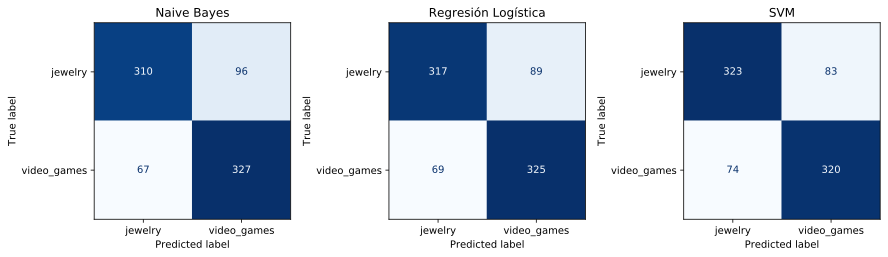

In [27]:
%config InlineBackend.figure_format = 'svg'

fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(1,3,1)
plot_confusion_matrix(nb, X_test, y_test, cmap = 'Blues', ax=ax1).im_.colorbar.remove()
plt.title("Naive Bayes")

ax2 = fig.add_subplot(1,3,2)
plot_confusion_matrix(logreg, X_test, y_test, cmap = 'Blues', ax=ax2).im_.colorbar.remove()
plt.title("Regresión Logística")

ax3 = fig.add_subplot(1,3,3)
plot_confusion_matrix(svm, X_test, y_test, cmap = 'Blues', ax=ax3).im_.colorbar.remove() # normalize='true'
plt.title("SVM");

###  `[BONUS: 1 pts]` Términos más importantes de cada categoría

In [29]:
vocab = {value:key for key, value in tfidf_vect_clasificacion.vocabulary_.items()}

In [30]:
[(vocab[e[0]],round(e[1],2)) for e in zip(nb.feature_log_prob_[0, :].argsort(),sorted(logreg.coef_[0]))][-10:]

[('plata', 0.5),
 ('buen', 0.52),
 ('bien', 0.53),
 ('bonito', 0.54),
 ('foto', 0.56),
 ('bonitos', 0.57),
 ('precio', 0.59),
 ('bonita', 0.86),
 ('regalo', 1.03),
 ('calidad', 1.5)]

In [32]:
[(vocab[e[0]],round(e[1],2)) for e in zip(logreg.coef_[0].argsort(),sorted(logreg.coef_[0]))][-10:]

[('cable', 0.5),
 ('ratón', 0.52),
 ('ps', 0.53),
 ('nintendo', 0.54),
 ('sonido', 0.56),
 ('consola', 0.57),
 ('juegos', 0.59),
 ('mando', 0.86),
 ('perfecto', 1.03),
 ('juego', 1.5)]

# Parte 2: Agrupación

###  `[6 pts]` Punto 1: Hacer pre-procesamiento del texto

In [55]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)
tfidf = tfidf_vect.fit_transform(data.review_body.values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns=tfidf_vect.get_feature_names())

###  `[6 pts]` Punto 2: Método del codo para determinar $K$

In [56]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import sys

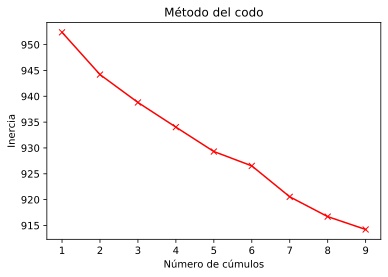

In [57]:
ks = []
kinertia = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
    ks.append(k)
    kinertia.append(kmeans.inertia_)
    
plt.xlabel("Número de cúmulos"); 
plt.ylabel("Inercia");
plt.title('Método del codo')
plt.plot(ks,kinertia, 'rx-');

###  `[6 pts]` Punto 3: Entrenar modelo con el $K$ escogido

In [58]:
k_pt = 6
model = KMeans(n_clusters=k_pt)
model.fit(tfidf_matrix)
nbrs = NearestNeighbors(n_neighbors=3, metric='euclidean').fit(tfidf_matrix.values)

data['cluster'] = model.labels_
clust_cnt = data['cluster'].value_counts()
clust_cnt_pct = data['cluster'].value_counts(normalize=True)

print(f"CLUSTERS:\n")
centroids = model.cluster_centers_
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vect.get_feature_names()

for i in range(k_pt):
    print(f"Cluster {i}:")
    print(f"COUNT  {clust_cnt[i]} comments ({clust_cnt_pct[i]:.2%} of the data)")
    print(f"TERMS ", end=" ")
    for ind in order_centroids[i, :20]:
        print(f'{terms[ind]}', end=" "),
    print(f"\nREPRESENTATIVE COMMENTS")
    for comment in data.iloc[nbrs.kneighbors([centroids[i]])[1][0]]['review_body'].values:
        print(f"* {comment}")
    print("\n")

CLUSTERS:

Cluster 0:
COUNT  142 comments (14.20% of the data)
TERMS  muy calidad bonito es buena la pero precio bien el se de queda un bonita no en que pulsera tal 
REPRESENTATIVE COMMENTS
* Es un colgante muy bonito, pero es muy muy pequeño, demasiado . El plazo de entrega ha sido muy rápido.
* Calidad precio muy buena
* Es un colgante precioso. La cadena es muy finita. Parece de buena calidad y puesto queda muy bien.


Cluster 1:
COUNT  342 comments (34.20% of the data)
TERMS  que la el de es no en se por lo con un pero para los bien me precio más una 
REPRESENTATIVE COMMENTS
* La pulsera es de muy buena calidad, la verdad es que era algo reacio a adquirir este tipo de regalos a través de Amazon, pero está pulsera me ha demostrado lo equivocado que estaba... Al ser de acero inoxidable está brillante como el primer día, a mi novia aun no se le ha puesto negra ni nada extraño y eso que no se la quita para nada, la lleva puesta 24/7. De hecho recientemente, fuimos a una boda nocturna y

###  `[BONUS: 3 pts]` Visualización usando PCA

In [60]:
clusters = {0:'Joyeria: Precio y Calidad',
            1:'Conforme con el producto',
            2:'Producto con alguna inconformidad',
            3:'Entrega correcta',
            4:'Compra no corresponde a lo visto',
            5:'La compra no ha llegado'}

data['cluster'] = data['cluster'].apply(lambda val: clusters[val])
data.sample(4)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,cluster
205,es_0692850,product_es_0140646,reviewer_es_0605142,5,Justo lo que esperaba. Perfecto y rápido.,Justo lo que esperaba. Perfecto y rápido.,es,video_games,Entrega correcta
239,es_0061914,product_es_0849725,reviewer_es_0013676,2,En switch he configurado el uso del mando pro ...,"No funciona, o no se hacerlo funcionar",es,video_games,Conforme con el producto
905,es_0986903,product_es_0986716,reviewer_es_0664730,5,Son como me esperaba no me ha decepcionado nada,Muy contenta,es,jewelry,La compra no ha llegado
891,es_0582015,product_es_0979462,reviewer_es_0566869,5,"Todo,el artículo es una pasada,y lo han entreg...","Todo,la calidad del artículo y la rapidez en l...",es,video_games,La compra no ha llegado


In [61]:
df_centroides = pd.DataFrame(model.cluster_centers_)
df_centroides['cluster'] = clusters.values()
df_centroides

,0,1,2,3,4,5,6,7,8,9,...,3820,3821,3822,3823,3824,3825,3826,3827,3828,cluster
0,0.000000e+00,6.645533e-03,1.084202e-19,-1.219727e-19,1.084202e-19,0.000000,-3.252607e-19,-2.710505e-20,1.084202e-19,3.252607e-19,...,-1.084202e-19,-1.219727e-19,5.421011e-20,1.626303e-19,-1.626303e-19,2.168404e-19,1.084202e-19,8.673617e-19,4.611084e-03,Joyeria: Precio y Calidad
1,1.126902e-03,1.010187e-03,5.421011e-20,3.440169e-04,1.147134e-03,0.000488,3.599026e-04,3.946922e-04,-2.710505e-19,6.824572e-04,...,1.301043e-18,3.440169e-04,4.006636e-04,2.710505e-19,-2.710505e-19,2.751301e-03,7.375219e-04,3.576544e-03,6.505213e-19,Conforme con el producto
2,1.902074e-03,8.673617e-19,3.794708e-19,-1.626303e-19,1.626303e-19,0.000741,2.102818e-03,-1.626303e-19,1.372424e-03,5.421011e-19,...,8.673617e-19,-1.626303e-19,5.421011e-20,1.292321e-03,1.177413e-03,-5.421011e-19,1.084202e-19,1.632137e-03,2.558729e-03,Producto con alguna inconformidad
3,-2.168404e-19,0.000000e+00,3.367213e-03,-4.065758e-20,1.084202e-19,0.000000,1.084202e-19,5.421011e-20,-1.626303e-19,1.084202e-19,...,9.681329e-03,-4.065758e-20,5.421011e-20,5.421011e-20,0.000000e+00,-1.084202e-19,5.421011e-20,4.336809e-19,6.505213e-19,Entrega correcta
4,-1.084202e-19,4.336809e-19,0.000000e+00,-4.065758e-20,5.421011e-20,0.001567,1.084202e-19,5.421011e-20,-5.421011e-20,3.767183e-03,...,-1.084202e-19,-4.065758e-20,2.710505e-20,5.421011e-20,-1.084202e-19,1.084202e-19,1.084202e-19,4.332776e-03,4.336809e-19,Compra no corresponde a lo visto
5,2.168404e-19,4.336809e-19,0.000000e+00,-8.131516e-20,1.084202e-19,0.001970,-1.084202e-19,2.710505e-20,5.421011e-20,3.252607e-19,...,-1.084202e-19,-8.131516e-20,5.421011e-20,1.626303e-19,-1.084202e-19,5.421011e-19,1.084202e-19,8.673617e-19,6.505213e-19,La compra no ha llegado


In [62]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

In [70]:
pca = PCA(n_components=2)

result = pca.fit_transform(tfidf_matrix)
result = pd.DataFrame(result)
result.columns = ['X', 'Y']
result['cluster'] = data.cluster.values
result['texto'] = data.review_body.apply(lambda val: val[:140])

colorsIdx = {'Joyeria: Precio y Calidad': 'blue', 
             'Conforme con el producto': 'yellow',
             'Producto con alguna inconformidad': 'green',
             'Entrega correcta': 'red',
             'Compra no corresponde a lo visto' : 'brown',
              'La compra no ha llegado': 'orange'}

cols = data['cluster'].map(colorsIdx)

trace = go.Scatter(x=result['X'].values,
                   y=result['Y'].values,
                   text=result['texto'].values,
                   mode='markers',
                   marker=dict(color=cols)) 

layout = go.Layout(title="PCA")

fig = go.Figure(data=trace, layout=layout)
iplot(fig)

# Parte 3: Comparación

### `[6 pts]` Punto 1: Hacer predicción para estas dos frases de los dos modelos

In [68]:
# resultado para clasificacion
test = ["Necesitas el juego inicial para eso", "Preciosos estos aretes, buena calidad"]
nuevo_test = tfidf_vect.transform(test)
model.predict(nuevo_test)

array([2, 0])

In [28]:
# Resultados para la agrupacion
nuevo = ["Necesitas el juego inicial para eso", "Preciosos estos aretes, buena calidad"]
nuevo_trans = tfidf_vect_clasificacion.transform(nuevo)
logreg.predict(nuevo_trans)

array(['video_games', 'jewelry'], dtype=object)

### `[2 pts]` Punto 2: Preguntas

- ¿A cuál modelo le fue mejor? 

    En el caso que se requiera predecir, una de las dos categorias (juegos o joyeria) es mas adecuado usar alguno de los modelos de clasificación. Por otra parte el modelo de agrupación de acuerdo a lo que observo; concluyo puede ser utilizado para obtener mayor claridad de a que corresponde cada registro y como se distribuye en relación a los demas. 


- ¿Cuál modelo se demoró más en entrenar? 
   
    Respuesta: Me demoré mas entrenando el modelo de K-means; sin embargo por algunos otros ejercicios realizados un modelo de regresión  logistica puede ser demorado en el entrenamiento cuando se debe realizar la predicción basandose en la información de varias variables tanto categoricas como numericas. 
   

- Según los resultados del $K$-Means, ¿cuál es la estructura latente de los datos?
    
    Respuesta: Hay datos muy dispersos que son los que se alejan de los demas; los cuales corresponden a clientes 100% satisfechos con la calidad del producto (color azul) y otros disgutados por la demora en la entrega o por la no entrega del producto (naranja)


- ¿Alguna otra observación?